<a href="https://colab.research.google.com/github/mukkatharun/DimensionalityReductionTechniques/blob/main/DimensionalityReductionTechniquesImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction Techniques on Image dataset**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Exploratory Data Analysis (EDA)**

In [4]:
data.shape

(42000, 785)

Label columns shows the digit, which the image data is given. Lets look into a sample image

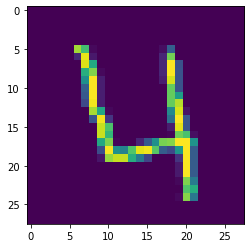

In [5]:
image_sample = data.iloc[3, 1:].to_numpy().reshape(28,28)
plt.imshow(image_sample)

In [6]:
data['label'].unique() # we have total of 10 digits

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [7]:
data = data.groupby('label').head(40)
df = data.loc[ : , data.columns != 'label']
df.shape

(400, 784)

**Principal Component Analysis**

In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)
# fit on data
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,principal component 1,principal component 2,label
0,-536.703463,730.359527,1
1,1903.866070,33.157829,0
2,-771.073556,411.312111,1
3,-149.801713,-242.602309,4
4,2163.775689,66.148717,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


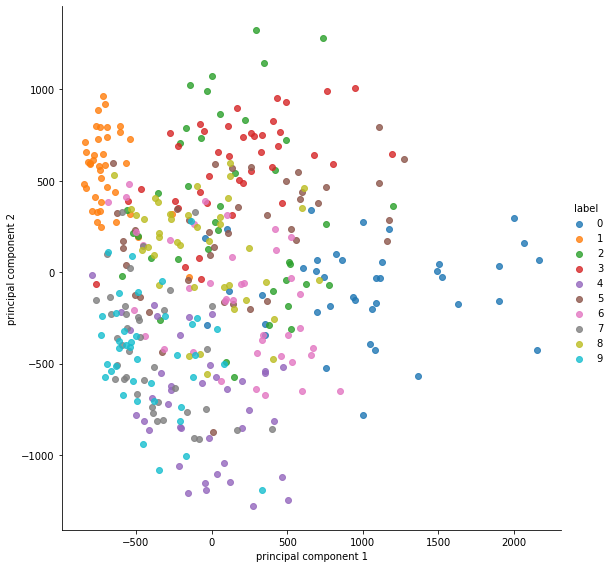

In [9]:
import seaborn as sns
sns.lmplot('principal component 1', 'principal component 2', data=principalDf, hue='label', fit_reg=False, size=8, height=6)
plt.show()

**singular value decomposition (SVD)**

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(df)

In [11]:
principalDf = pd.DataFrame(data = svd_data
             , columns = ['svd component 1','svd component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,svd component 1,svd component 2,label
0,946.661238,-195.367982,1
1,2275.447062,1678.858181,0
2,927.226216,-471.041503,1
3,706.611042,158.425002,4
4,2389.282672,1909.400416,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


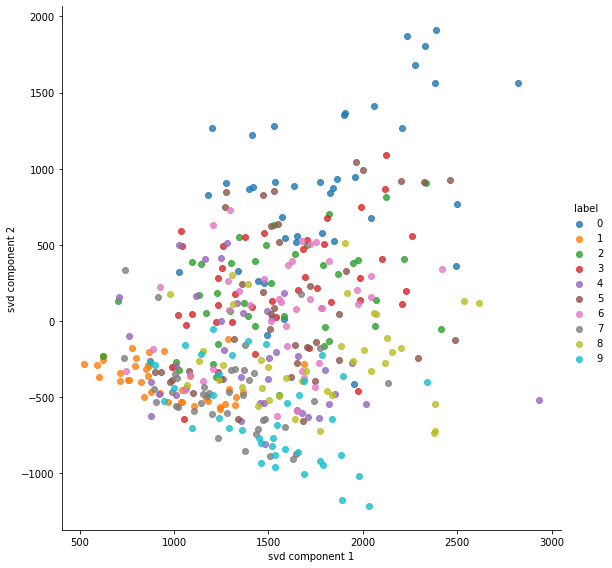

In [12]:
import seaborn as sns
sns.lmplot('svd component 1', 'svd component 2', data=principalDf, hue='label', fit_reg=False, size=8)

plt.show()

**Locally Linear Embedding**

In [13]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
lle_data = lle.fit_transform(df)

In [14]:
principalDf = pd.DataFrame(data = lle_data
             , columns = ['lle component 1','lle component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,lle component 1,lle component 2,label
0,-0.064080,0.064263,1
1,-0.029044,-0.244110,0
2,-0.051459,-0.015164,1
3,0.013445,0.007278,4
4,-0.029438,-0.263493,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


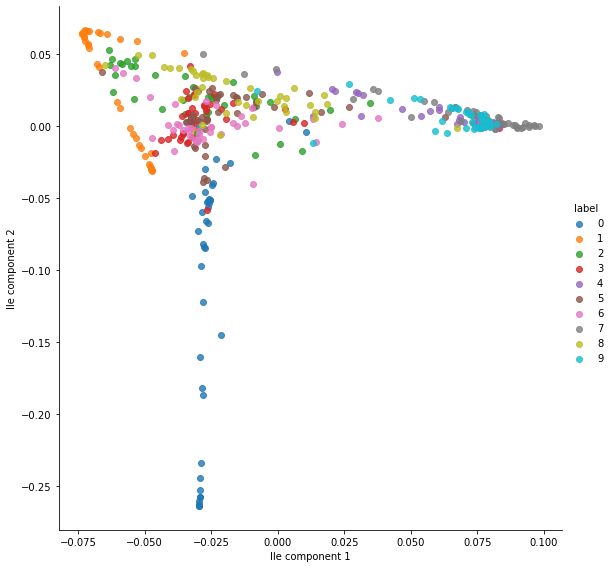

In [15]:
import seaborn as sns 
sns.lmplot('lle component 1', 'lle component 2', data=principalDf, hue='label', fit_reg=False, size=8, height=6)

plt.show()

**t-distributed stochastic neighbor embedding (tsne)**


In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_data = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.020s...
[t-SNE] Computed neighbors for 400 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 663.385140
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.515854
[t-SNE] KL divergence after 300 iterations: 1.039255


In [40]:
principalDf = pd.DataFrame(data = tsne_data
             , columns = ['tsne component 1','tsne component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,tsne component 1,tsne component 2,label
0,2.635102,-5.609082,1
1,12.238746,9.107063,0
2,7.830688,-5.461284,1
3,-10.377097,3.433104,4
4,12.018864,8.867615,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


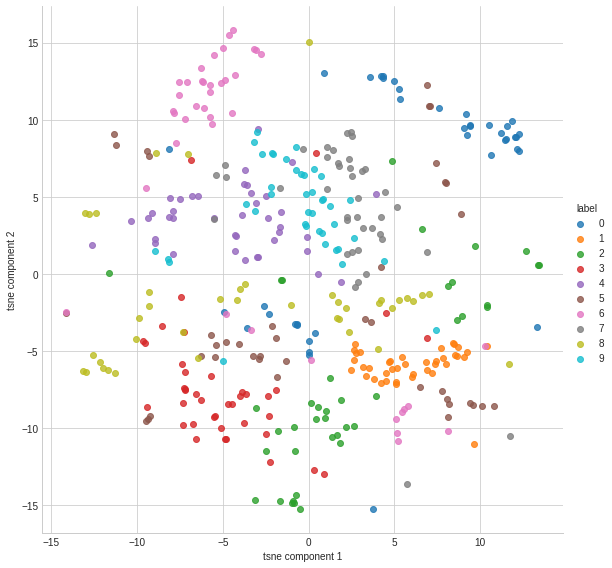

In [41]:
import seaborn as sns 
# plt.figure(figsize=(14,10))
sns.lmplot('tsne component 1', 'tsne component 2', data=principalDf, hue='label', fit_reg=False, size=8, height=6)

plt.show()

**Uniform Manifold Approximation and Projection (UMAP)**

In [ ]:
!pip install umap-learn[plot]

In [33]:
import umap
umap_data = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      n_components=2,
                      metric='correlation').fit_transform(df)

In [34]:
principalDf = pd.DataFrame(data = umap_data
             , columns = ['umap component 1','umap component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,umap component 1,umap component 2,label
0,4.565370,0.470145,1
1,6.683148,10.103577,0
2,-1.362217,5.193762,1
3,9.701195,7.825546,4
4,6.809072,9.935056,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


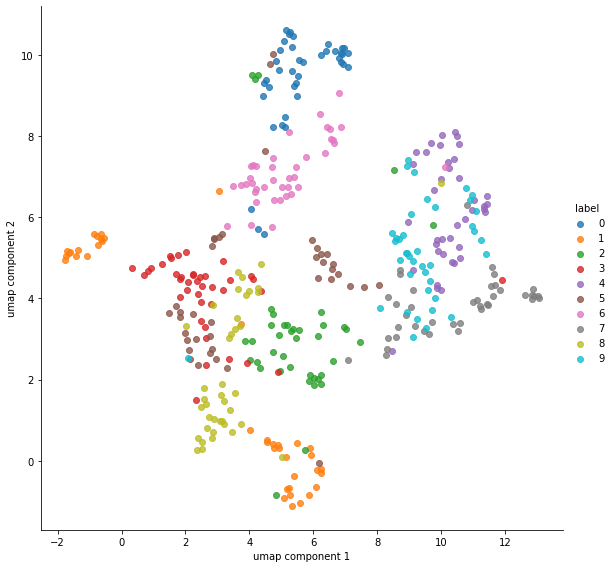

In [35]:
import seaborn as sns 
sns.lmplot('umap component 1', 'umap component 2', data=principalDf, hue='label', fit_reg=False, size=8, height=6)

plt.show()

**Isometric Mapping (Isomap)**

In [20]:
from sklearn.manifold import Isomap
embed = Isomap(n_components = 2, n_neighbors=5)
isomap_data = embed.fit_transform(df)

In [21]:
principalDf = pd.DataFrame(data = isomap_data
             , columns = ['isomap component 1','isomap component 2'])
var = data.iloc[:,0].values
principalDf['label']=pd.Series(var)
principalDf.head()

,isomap component 1,isomap component 2,label
0,-1328.191443,-3897.203133,1
1,6116.749639,3734.627924,0
2,13.473006,-2104.151554,1
3,-1801.688798,670.323505,4
4,7169.509527,3853.096186,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


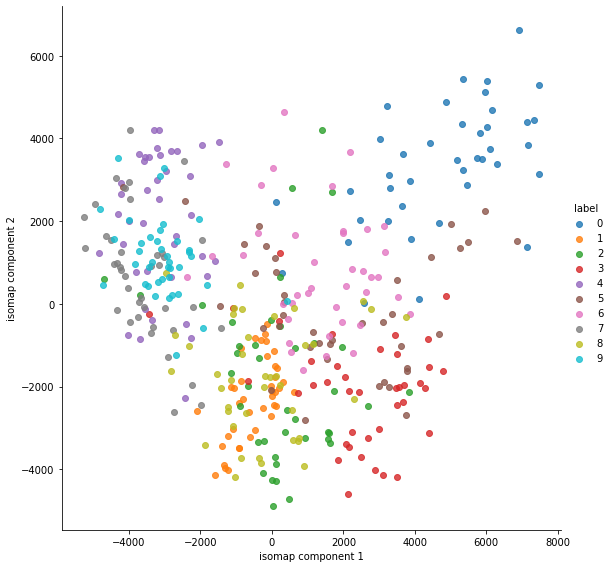

In [23]:
import seaborn as sns 
sns.lmplot('isomap component 1', 'isomap component 2', data=principalDf, hue='label', fit_reg=False, size=8, height=6)
plt.show()

**Conclusion**

After analysing all the 6 algo's visualizations, **Umap** performs better dimensionality reduction for this particular dataset. In other visualisations we can see a lot of overlapping of data points when compared to Umap.